# Exercise 1

In [1]:
import numpy as np

#### 1. Create vectors

In [2]:
vector1 = np.array([5, 8, 7, 6, 7, 8])
vector2 = np.array([1.3, 2.1, 1.7, 1.1, 1.4, 2.3])
vector3 = np.array(['y', 'y', 'n', 'y', 'n', 'n'])

In [3]:
print(vector1)

[5 8 7 6 7 8]


In [4]:
print(vector2)

[1.3 2.1 1.7 1.1 1.4 2.3]


In [5]:
print(vector3)

['y' 'y' 'n' 'y' 'n' 'n']


In [6]:
# Creating matrix (Order 6X3)
matrix = np.array([vector1, vector2, vector3]).T

In [7]:
print(matrix)

[['5' '1.3' 'y']
 ['8' '2.1' 'y']
 ['7' '1.7' 'n']
 ['6' '1.1' 'y']
 ['7' '1.4' 'n']
 ['8' '2.3' 'n']]


a) print element (3,2).

In [8]:
print(matrix[3,2])

y


b) print the 4th row.

In [9]:
print(matrix[4])

['7' '1.4' 'n']


c) create submatrix of 2 last columns and rows 2-5

In [10]:
# Creating sub matrix (rows 2-5 and last 2 columns (1-2))
# format matrix[row_lower_bound:row_upper_bound, col_lower_bound:col_lower_bound]
subMatrix = matrix[2:6, 1:3]

In [11]:
print(subMatrix)

[['1.7' 'n']
 ['1.1' 'y']
 ['1.4' 'n']
 ['2.3' 'n']]


d) transpose the data matrix so that it has 6 columns and 3 rows.

In [12]:
matrix_T = matrix.T

In [13]:
print(matrix_T)

[['5' '8' '7' '6' '7' '8']
 ['1.3' '2.1' '1.7' '1.1' '1.4' '2.3']
 ['y' 'y' 'n' 'y' 'n' 'n']]


#### 3. Find out if the following data points are normally distributed or not

##### a.) 170, 192, 184, 165, 176, 181, 163

##### b.) 170, 170, 170, 170, 192, 192, 192, 192, 184, 184, 184, 184, 165, 165, 165, 165, 176, 176, 176, 176, 181, 181, 181, 181, 163, 163, 163, 163

In [14]:
from scipy.stats import shapiro
from scipy.stats import kstest

In [15]:
data1 = (170, 192, 184, 165, 176, 181, 163)
data2 = (170, 170, 170, 170, 192, 192, 192, 192, 184, 184, 184, 184, 165, 165, 165, 165, 176, 176,
176, 176, 181, 181, 181, 181, 163, 163, 163, 163)

##### If (P-value < 0.05) => data is not normally distributed

##### • Shapiro–Wilk test

In [16]:
# shapiro(data1)
shapiro_p_value_data1 = shapiro(data1).pvalue # or shapiro(data1)[1]
print(f'P-value of data1 - {shapiro_p_value_data1}')

shapiro_p_value_data2 = shapiro(data2).pvalue # or shapiro(data2)[1]
print(f'P-value of data2 - {shapiro_p_value_data2}')

P-value of data1 - 0.8202127814292908
P-value of data2 - 0.015374246053397655


##### Therefore, data1 is normally distributed and data2 is not normally distributed

##### • Kolmogorov–Smirnov test

In [17]:
kstest_p_value_data1 = kstest(data1,'norm',(np.mean(data1),np.std(data1))).pvalue
print(f'P-value of data1 - {kstest_p_value_data1}')

kstest_p_value_data2 = kstest(data2,'norm',(np.mean(data2),np.std(data2))).pvalue
print(f'P-value of data2 - {kstest_p_value_data2}')

P-value of data1 - 0.986347960230188
P-value of data2 - 0.47573618419230546


##### Therefore, data1 and data2 are not normally distributed

#### 4. Create histogram and density plot of the two datasets given in Exercise 3

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

##### a.) 170, 192, 184, 165, 176, 181, 163


In [19]:
data1 = pd.Series((170, 192, 184, 165, 176, 181, 163))
bin1 = (150,160,170,180,190,200,210)

##### Histogram 1

<AxesSubplot:ylabel='Frequency'>

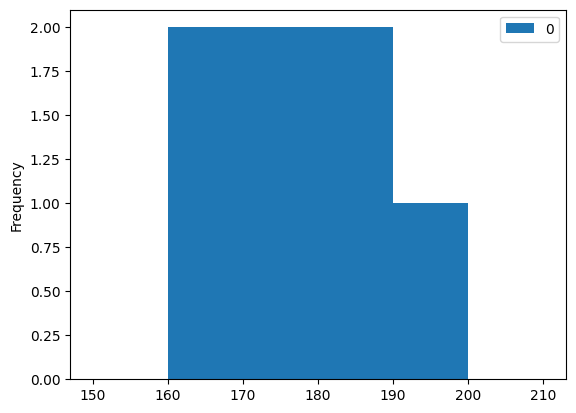

In [20]:
pd.DataFrame(data1).plot(kind='hist', bins=bin1)

##### Density Plot 1

<AxesSubplot:ylabel='Density'>

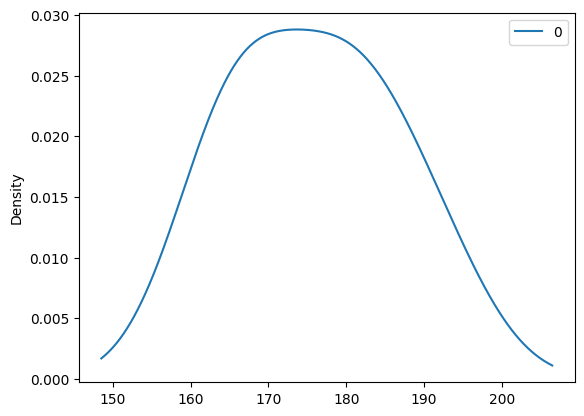

In [21]:
pd.DataFrame(data1).plot(kind='density')

In [22]:
data2 = pd.Series((170, 170, 170, 170, 192, 192, 192, 192, 184, 184, 184, 184, 165, 165, 165, 165, 176, 176,
176, 176, 181, 181, 181, 181, 163, 163, 163, 163))
bin2 = (150,160,170,180,190,200,210)

##### b.) 170, 170, 170, 170, 192, 192, 192, 192, 184, 184, 184, 184, 165, 165, 165, 165, 176, 176, 176, 176, 181, 181, 181, 181, 163, 163, 163, 163

##### Histogram 2

<AxesSubplot:ylabel='Frequency'>

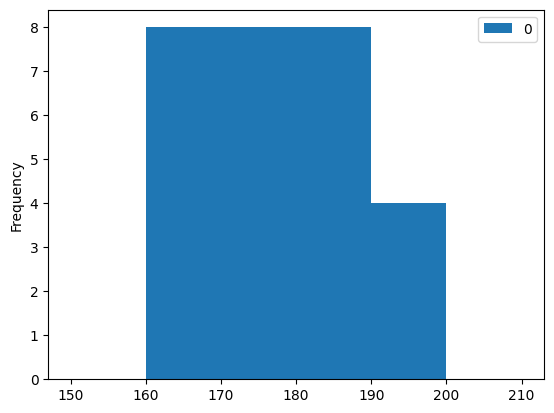

In [23]:
pd.DataFrame(data2).plot(kind='hist',bins=bin2)

##### Density Plot 2

<AxesSubplot:ylabel='Density'>

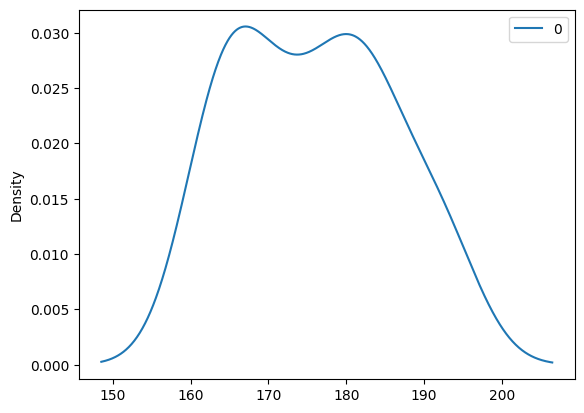

In [24]:
pd.DataFrame(data2).plot(kind='density')

#### 5. We consider world temperature (https://climate.nasa.gov/vital-signs/global-temperature/). Download the dataset and consider No_smoothing variable. Define mean and median for the data. Is the variable normally distributed? How about, is the variable normally distributed if measurements from year 2000 onwards are only considered?

In [25]:
# df = pd.read_csv('graph.txt', delimiter='\s+', header=4, names=['Year','No_Smoothing','Lowess(5)']) # or

In [26]:
# read text file and remove the unwanted text
df = pd.read_csv('graph.txt', delimiter='\s+', header=2)
df.drop(0, inplace=True)
# equivalent to df = df.drop(0) [so that changes are reflected in the data frame]

In [27]:
df

,Year,No_Smoothing,Lowess(5)
1,1880,-0.17,-0.09
2,1881,-0.08,-0.13
3,1882,-0.11,-0.17
4,1883,-0.18,-0.20
5,1884,-0.28,-0.24
...,...,...,...
138,2017,0.92,0.91
139,2018,0.85,0.92
140,2019,0.98,0.93
141,2020,1.01,0.93


In [28]:
df['No_Smoothing']

1     -0.17
2     -0.08
3     -0.11
4     -0.18
5     -0.28
       ... 
138    0.92
139    0.85
140    0.98
141    1.01
142    0.84
Name: No_Smoothing, Length: 142, dtype: float64

In [29]:
df['No_Smoothing'].mean()

0.053169014084507096

In [30]:
df['No_Smoothing'].median()

-0.065

In [31]:
no_smoothing_col = df['No_Smoothing']

In [32]:
kstest(no_smoothing_col,'norm',(np.mean(no_smoothing_col),np.std(no_smoothing_col))).pvalue

0.012028402273352378

##### Therefore, data is not normally distributed

In [33]:
df_subset = df.tail(22)['No_Smoothing']

In [34]:
df_subset

121    0.39
122    0.54
123    0.63
124    0.62
125    0.53
126    0.68
127    0.63
128    0.66
129    0.54
130    0.66
131    0.72
132    0.61
133    0.65
134    0.68
135    0.75
136    0.90
137    1.01
138    0.92
139    0.85
140    0.98
141    1.01
142    0.84
Name: No_Smoothing, dtype: float64

In [35]:
kstest(df_subset,'norm',(np.mean(df_subset),np.std(df_subset))).pvalue

0.41031476104712195

##### Therefore, the data is normally distributed